<a href="https://colab.research.google.com/github/chandankr014/passionate/blob/master/livedata_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scraping data 
#### from yahoo finance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf


In [ ]:
# nifty = yf.download(tickers='^NSEI', period='1d', interval='1m')
# nifty

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-27 09:15:00+05:30,16984.300781,16990.300781,16960.000000,16988.000000,16988.000000,0
2023-03-27 09:16:00+05:30,16985.300781,16985.300781,16970.849609,16972.300781,16972.300781,0
2023-03-27 09:17:00+05:30,16973.500000,16986.150391,16966.550781,16969.750000,16969.750000,0
2023-03-27 09:18:00+05:30,16968.849609,16985.250000,16961.199219,16964.150391,16964.150391,0
2023-03-27 09:19:00+05:30,16964.949219,16974.900391,16960.599609,16963.199219,16963.199219,0
...,...,...,...,...,...,...
2023-03-27 15:25:00+05:30,16975.000000,16977.199219,16967.650391,16971.900391,16971.900391,0
2023-03-27 15:26:00+05:30,16970.599609,16972.250000,16965.250000,16965.300781,16965.300781,0
2023-03-27 15:27:00+05:30,16965.000000,16971.300781,16963.400391,16964.400391,16964.400391,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader


In [ ]:
# For time stamps
from datetime import datetime
company_name = ["NIFTY50", "STATE BANK OF INDIA", "TATA STEEL", "ADANI POWER", "HDFC AMC"]
stk_symbol = ['^NSEI', 'SBIN.NS', 'TATASTEEL.NS', 'ADANIPOWER.NS', 'HDFCAMC.NS']
i_stk = 1
prd = '1wk'
ivl = '1m'
stock_data = yf.download(tickers=stk_symbol[i_stk], period=prd, interval=ivl)


[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-21 09:15:00+05:30,522.500000,522.799988,520.099976,520.099976,520.099976,0
2023-03-21 09:16:00+05:30,520.299988,521.599976,520.049988,521.549988,521.549988,307099
2023-03-21 09:17:00+05:30,521.299988,521.349976,520.250000,520.950012,520.950012,157576
2023-03-21 09:18:00+05:30,521.000000,522.000000,521.000000,521.849976,521.849976,104990
2023-03-21 09:19:00+05:30,521.950012,522.000000,521.500000,521.750000,521.750000,69162
...,...,...,...,...,...,...
2023-03-27 15:25:00+05:30,509.399994,509.549988,508.750000,509.000000,509.000000,41125
2023-03-27 15:26:00+05:30,508.899994,509.000000,508.750000,508.899994,508.899994,98985
2023-03-27 15:27:00+05:30,508.799988,509.000000,508.549988,508.750000,508.750000,37566


<Axes: xlabel='Datetime'>

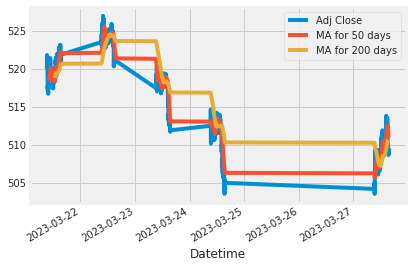

In [ ]:
#plotting moving averages
ma_day = [50, 200]

for ma in ma_day:
    for company in stk_symbol:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()
        

stock_data[['Adj Close', 'MA for 50 days', 'MA for 200 days']].plot()#.set_title(company_name[i_stk])


In [ ]:
stock_data.dropna()#.drop(['Volume', 'MA for 50 days', 'MA for 200 days'], axis=1, inplace=True)

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days
Datetime,,,,,,,,
2023-03-21 12:34:00+05:30,519.000000,519.099976,518.799988,518.900024,518.900024,69719,518.405999,519.187251
2023-03-21 12:35:00+05:30,518.799988,518.900024,518.400024,518.450012,518.450012,46304,518.397999,519.179001
2023-03-21 12:36:00+05:30,518.549988,518.650024,518.299988,518.349976,518.349976,50662,518.387999,519.163001
2023-03-21 12:37:00+05:30,518.349976,518.549988,518.349976,518.500000,518.500000,68327,518.381000,519.150751
2023-03-21 12:38:00+05:30,518.500000,518.500000,518.349976,518.450012,518.450012,32055,518.374000,519.133751
...,...,...,...,...,...,...,...,...
2023-03-27 15:25:00+05:30,509.399994,509.549988,508.750000,509.000000,509.000000,41125,511.352002,510.704501
2023-03-27 15:26:00+05:30,508.899994,509.000000,508.750000,508.899994,508.899994,98985,511.262001,510.708001
2023-03-27 15:27:00+05:30,508.799988,509.000000,508.549988,508.750000,508.750000,37566,511.169001,510.708751


In [ ]:
p_change = stock_data['Adj Close'].pct_change()
stock_data['Daily Return'] = p_change
print(stock_data['Daily Return'])

Datetime
2023-03-21 09:15:00+05:30         NaN
2023-03-21 09:16:00+05:30    0.002788
2023-03-21 09:17:00+05:30   -0.001150
2023-03-21 09:18:00+05:30    0.001728
2023-03-21 09:19:00+05:30   -0.000192
                               ...   
2023-03-27 15:25:00+05:30   -0.001079
2023-03-27 15:26:00+05:30   -0.000196
2023-03-27 15:27:00+05:30   -0.000295
2023-03-27 15:28:00+05:30    0.000197
2023-03-27 15:29:00+05:30    0.000197
Name: Daily Return, Length: 1863, dtype: float64


Text(0.5, 1.0, 'STATE BANK OF INDIA')

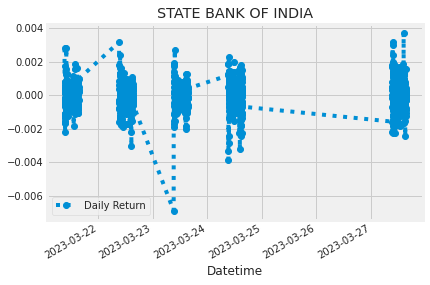

In [ ]:
stock_data['Daily Return'].plot(legend=True, linestyle=':', marker='o').set_title(company_name[i_stk])

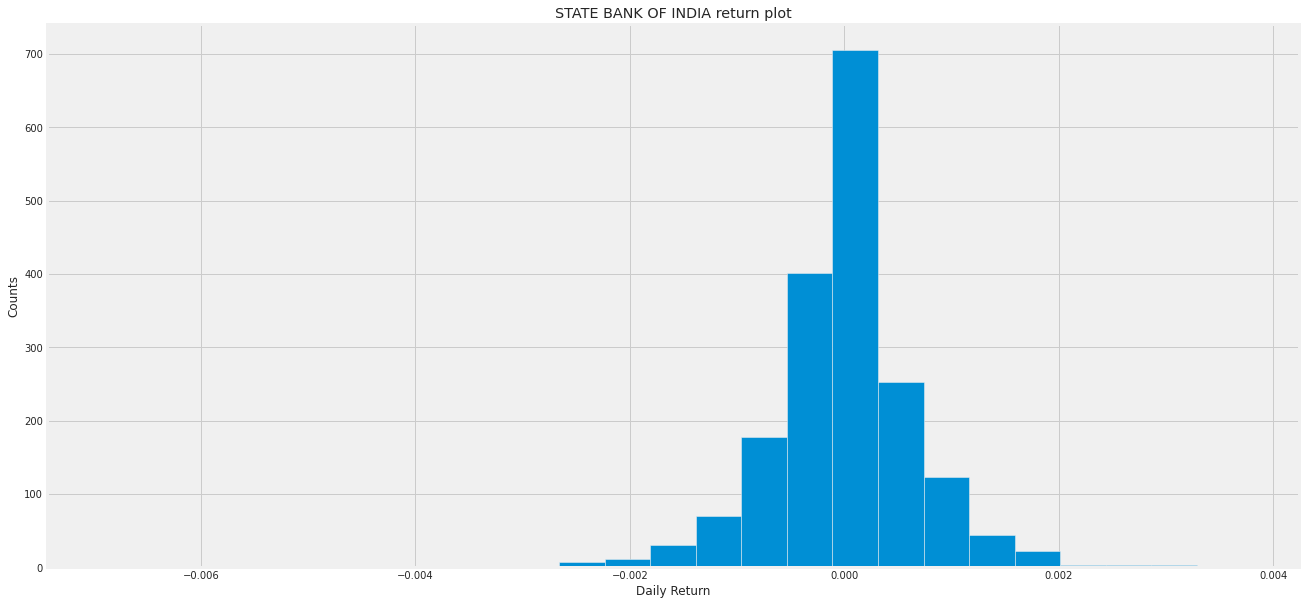

In [ ]:
plt.figure(figsize=(20, 10))

stock_data['Daily Return'].hist(bins=25)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'{company_name[i_stk]} return plot')

plt.show()

In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return
Datetime,,,,,,,,,
2023-03-27 15:25:00+05:30,509.399994,509.549988,508.750000,509.000000,509.000000,41125,511.352002,510.704501,-0.001079
2023-03-27 15:26:00+05:30,508.899994,509.000000,508.750000,508.899994,508.899994,98985,511.262001,510.708001,-0.000196
2023-03-27 15:27:00+05:30,508.799988,509.000000,508.549988,508.750000,508.750000,37566,511.169001,510.708751,-0.000295
2023-03-27 15:28:00+05:30,508.799988,508.950012,508.600006,508.850006,508.850006,16960,511.073000,510.709251,0.000197
2023-03-27 15:29:00+05:30,508.850006,509.000000,508.649994,508.950012,508.950012,27141,510.996001,510.710001,0.000197


In [ ]:
dt = stock_data['Adj Close'].tolist()
dt[:4]

[520.0999755859375, 521.5499877929688, 520.9500122070312, 521.8499755859375]

In [ ]:
dt_vol = stock_data['Volume'].tolist()
dt_vol[:4]

[0, 307099, 157576, 104990]

In [ ]:
norm_dt = [round(float(i) / max(dt), 4) for i in dt]

In [ ]:
norm_dt[:10]

[0.9869, 0.9897, 0.9885, 0.9902, 0.99, 0.9889, 0.9882, 0.987, 0.9874, 0.9878]

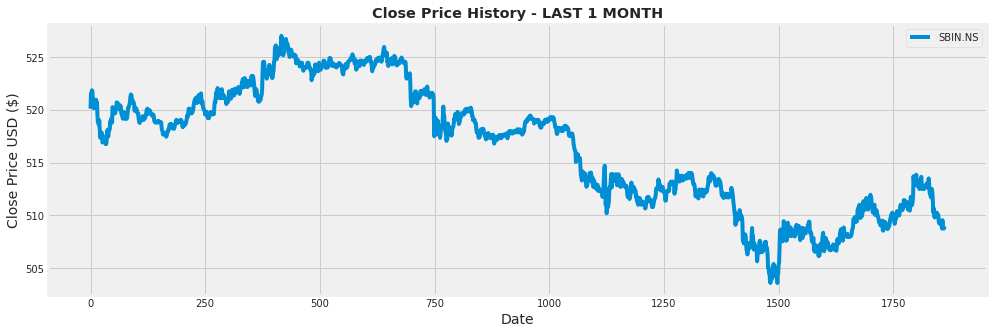

In [ ]:
# LAST 1 MONTHS CHART
plt.figure(figsize=(15,5))
plt.title('Close Price History - LAST 1 MONTH', fontweight='bold')
plt.plot(dt[:], label=stk_symbol[i_stk])
plt.legend()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

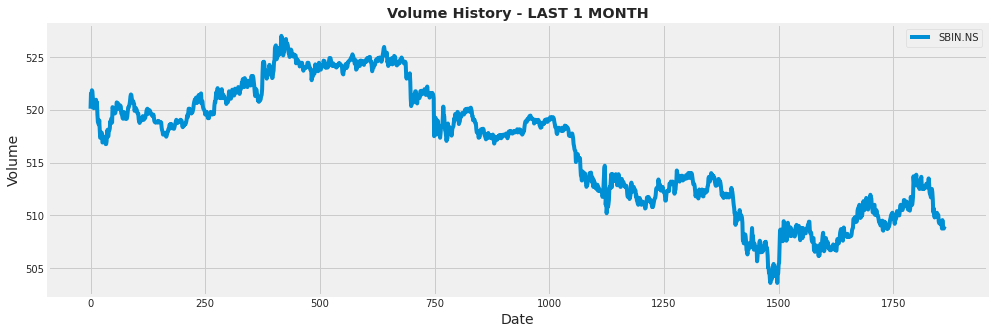

In [ ]:
# LAST 1 MONTHS CHART
plt.figure(figsize=(15,5))
plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
plt.plot(dt[:], label=stk_symbol[i_stk])
plt.legend()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

In [ ]:
dt_vol = stock_data['Volume'].tolist()
dt_vol[:5]

[0, 307099, 157576, 104990, 69162]

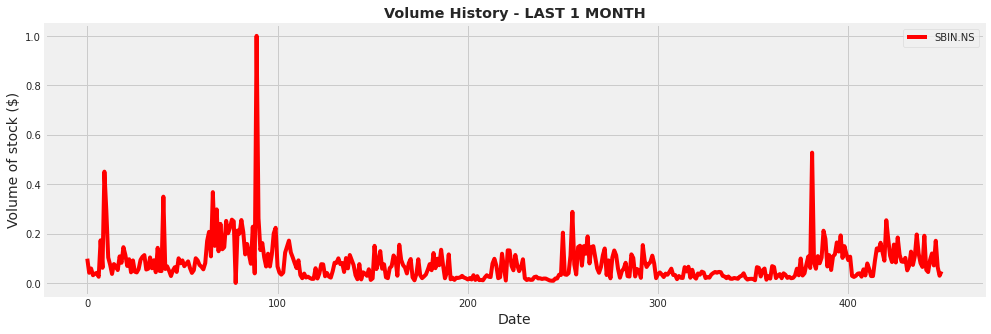

In [ ]:
try:
    norm_dt_vol = [round(float(i) / max(dt_vol), 4) for i in dt_vol]
    norm_dt_vol[:5]
    # LAST 1 MONTHS CHART
    plt.figure(figsize=(15,5))
    plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
    plt.plot(norm_dt_vol[-30*15:], label=stk_symbol[i_stk], color='r')
    plt.legend()
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume of stock ($)', fontsize=14)
    plt.show()
except ZeroDivisionError:
    print("Division by zero!")

## building model

In [ ]:
import pandas

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_dt = scaler.fit_transform(pandas.DataFrame(dt))

In [ ]:
scaled_dt[0:10]
type(scaled_dt)

numpy.ndarray

In [ ]:
l = len(scaled_dt)
l

1863

In [ ]:
r=int(l*0.7)
print(r)
train_data = (scaled_dt[0:r])
test_data  = (scaled_dt[r:])

1304


In [ ]:
print(len(train_data))
print(type(test_data))

1304
<class 'numpy.ndarray'>


In [ ]:
# convert an array of values into a dataset matrix
import numpy

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i+time_step:i+time_step+1])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 20
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(1283, 20, 1)
(1283, 1, 1)


In [ ]:
# Reshape the data (we reshape only x data not y)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_train.shape
x_test.shape

(538, 20, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1283/1283 [==============================] - 27s 18ms/step - loss: 0.0028
Epoch 2/10
1283/1283 [==============================] - 22s 17ms/step - loss: 0.0010
Epoch 3/10
1283/1283 [==============================] - 23s 18ms/step - loss: 7.3249e-04
Epoch 4/10
1283/1283 [==============================] - 23s 18ms/step - loss: 5.6516e-04
Epoch 5/10
1283/1283 [==============================] - 22s 17ms/step - loss: 4.5446e-04
Epoch 6/10
1283/1283 [==============================] - 22s 17ms/step - loss: 5.5655e-04
Epoch 7/10
1283/1283 [==============================] - 24s 19ms/step - loss: 4.2772e-04
Epoch 8/10
1283/1283 [==============================] - 23s 18ms/step - loss: 4.5378e-04
Epoch 9/10
1283/1283 [==============================] - 23s 18ms/step - loss: 4.3864e-04
Epoch 10/10
1283/1283 [==============================] - 22s 17ms/step - loss: 4.8360e-04


In [ ]:
y_test[x_test.shape[0]-10:]

array([[[0.23931656]],

       [[0.24786279]],

       [[0.24145279]],

       [[0.23931656]],

       [[0.22008527]],

       [[0.25427279]],

       [[0.23076903]],

       [[0.22649526]],

       [[0.22008527]],

       [[0.22435903]]])

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMS-Error:",rmse)

17/17 [==============================] - 2s 28ms/step
RMS-Error: 0.1388390818604333


In [ ]:
predictions.shape
# predictions

(538, 1)

In [ ]:
predictions = scaler.inverse_transform(predictions)
predictions[:10]

array([[511.9214 ],
       [511.77557],
       [511.58392],
       [511.90552],
       [512.34283],
       [512.2661 ],
       [512.0401 ],
       [512.2443 ],
       [512.09796],
       [511.8771 ]], dtype=float32)

In [ ]:
x_test.shape

(538, 20, 1)

In [ ]:
const = r+time_step+1
print(const)

1325


In [ ]:
valid = pandas.DataFrame(dt[const:l], columns=['StockName'])

In [ ]:
valid['Predictions'] = predictions  
valid.set_index(np.arange(const,l,1))

,StockName,Predictions
1325,511.600006,511.921387
1326,511.950012,511.775574
1327,512.450012,511.583923
1328,512.400024,511.905518
1329,512.150024,512.342834
...,...,...
1858,509.000000,508.710541
1859,508.899994,509.440338
1860,508.750000,508.903717
1861,508.850006,508.829102


In [ ]:
dt[0]
l

1863

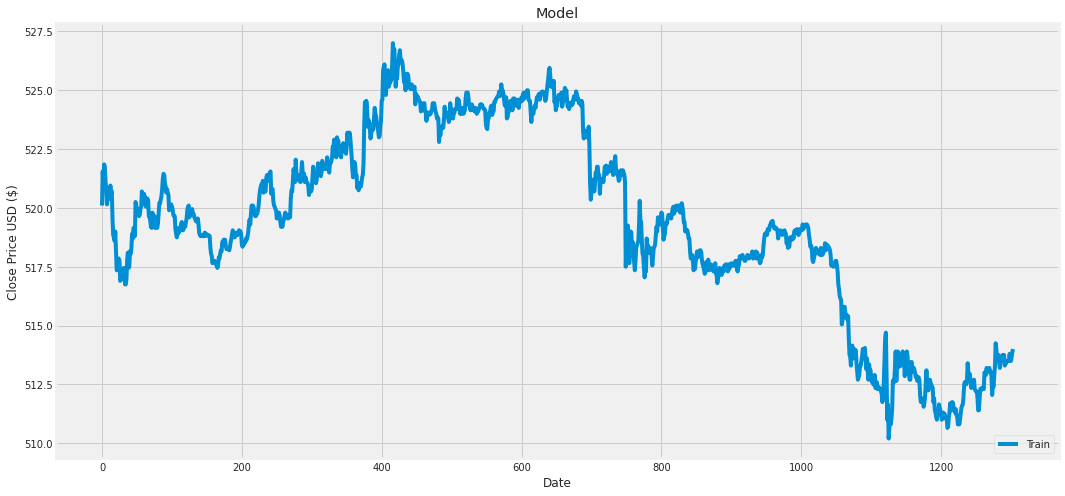

In [ ]:
## plotting predictions along with validations
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(dt[0:r])
# plt.plot(valid[['StockName', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

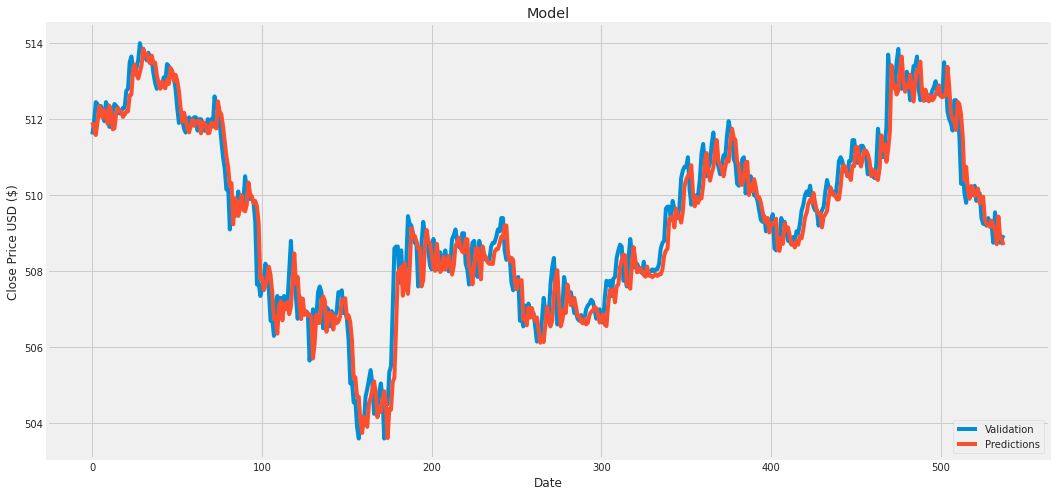

In [ ]:
## plotting predictions along with validations
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(dt[0:r])
plt.plot(valid[['StockName', 'Predictions']])
plt.legend(['Validation', 'Predictions'], loc='lower right')
plt.show()

### predicting future price using the model

In [ ]:
y_test.shape

(538, 1, 1)

In [ ]:
p = model.predict(y_test)

17/17 [==============================] - 1s 3ms/step


In [ ]:
p = scaler.inverse_transform(p)

In [ ]:
p.tolist()
[x[0] for x in p.tolist()]

In [ ]:
temp_dict = {"predictions":[x[0] for x in p.tolist()]}

In [ ]:
temp_dict['predictions'][0]

511.2704162597656

In [ ]:
tt = 372 #372 minutes trade occurs daily
ii = 1

In [ ]:
temp_dict_df = pandas.DataFrame(temp_dict['predictions'][0:tt])
temp_dict_df

,0
0,511.270416
1,511.089203
2,511.406708
3,511.863129
4,511.817322
...,...
367,511.134460
368,510.593567
369,510.459137
370,510.324982


In [ ]:
i1 = np.arange(0,tt,ii)
i1[:5]

array([0, 1, 2, 3, 4])

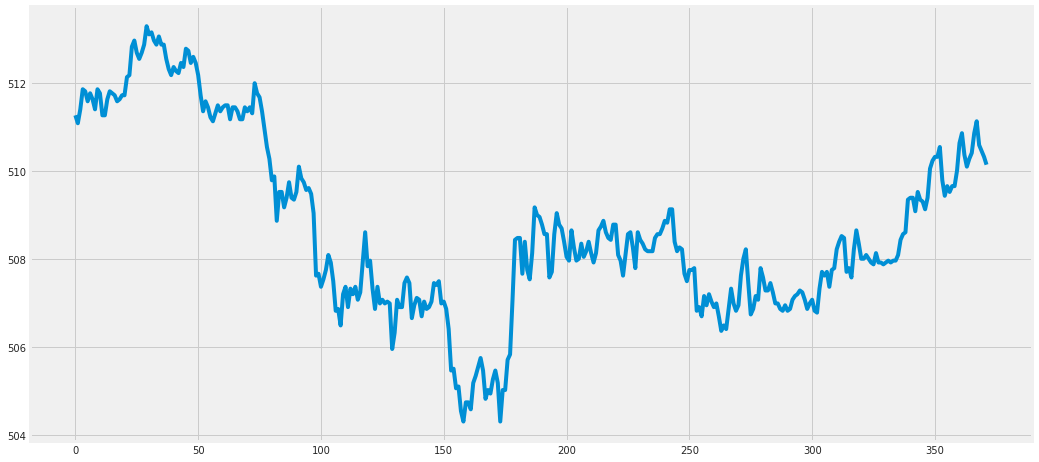

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(i1 , temp_dict_df)

In [ ]:
stock_data['Adj Close']

Datetime
2023-03-21 09:15:00+05:30    520.099976
2023-03-21 09:16:00+05:30    521.549988
2023-03-21 09:17:00+05:30    520.950012
2023-03-21 09:18:00+05:30    521.849976
2023-03-21 09:19:00+05:30    521.750000
                                ...    
2023-03-27 15:25:00+05:30    509.000000
2023-03-27 15:26:00+05:30    508.899994
2023-03-27 15:27:00+05:30    508.750000
2023-03-27 15:28:00+05:30    508.850006
2023-03-27 15:29:00+05:30    508.950012
Name: Adj Close, Length: 1863, dtype: float64

# Bollinger Band

In [ ]:
symbol = stk_symbol[i_stk]
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

In [ ]:
#for 20 DMA with 2 std
def get_bollinger_bands(close_price_col, rate=20):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down


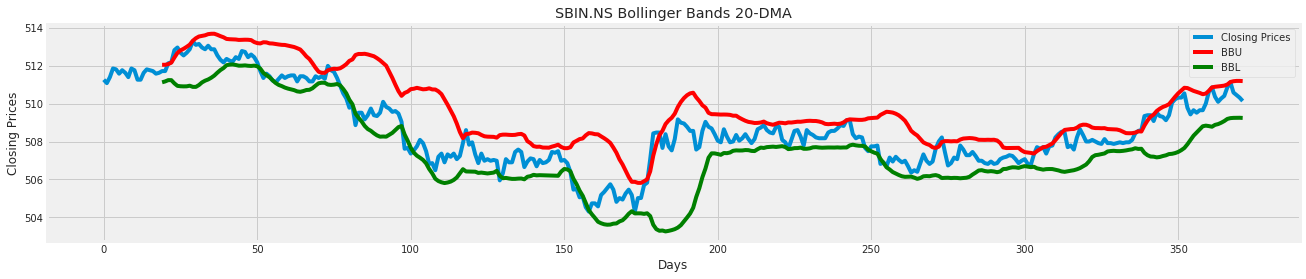

In [ ]:
bollinger_up, bollinger_down = get_bollinger_bands(temp_dict_df)

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 20-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='red')
plt.plot(bollinger_down, label='BBL', c='green')
plt.legend()
plt.show()

In [ ]:
#for 50 DMA with 2.5 std
def get_bollinger_bands_50(close_price_col, rate=50):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2.5
    bollinger_down = sma - std * 2.5
    return bollinger_up, bollinger_down


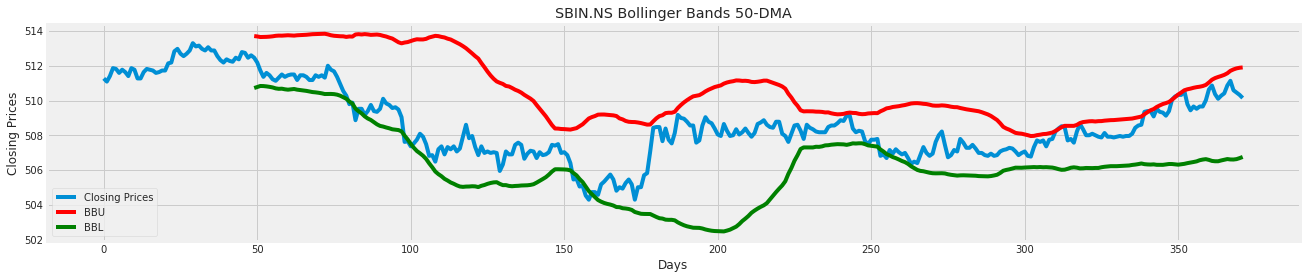

In [ ]:
bollinger_up, bollinger_down = get_bollinger_bands_50(temp_dict_df)#.dropna()

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 50-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='r')
plt.plot(bollinger_down, label='BBL', c='g')
plt.legend()
plt.show()

    when graph touches red line(bollinger UP)     -> sell
    when graph touches green line(bollinger DOWN) -> buy

In [ ]:
# bollinger_down.rename(columns={0:'bbl'})
bollinger_down.fillna(value=1, axis=0, inplace=True)
bollinger_up.fillna(value=1, axis=0, inplace=True)

In [ ]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data[0])):
        if (data[0][i] > lower_bb[0][i]) and (data[0][i] < lower_bb[0][i]):
            if signal != 1:
                buy_price.append(data[0][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[0][i] < upper_bb[0][i] and data[0][i] > upper_bb[0][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[0][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(temp_dict_df, bollinger_down, bollinger_up)



---



---



In [ ]:
import datetime

In [ ]:
bdown = bollinger_down.mean()
bup = bollinger_up.mean()
bdown,bup

(0    439.670595
 dtype: float64, 0    443.427029
 dtype: float64)

In [ ]:
bollinger_down.fillna(value=bdown, inplace=True)
bollinger_up.fillna(value=bup, inplace=True)

In [ ]:
print(bollinger_up.iloc[-1][0])
print(temp_dict_df.iloc[-1][0])
print(bollinger_down.iloc[-1][0])
msg1=''
if temp_dict_df.iloc[-1][0] > bollinger_up.iloc[-1][0]:
    msg1 = "buy signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)
if temp_dict_df.iloc[-1][0] < bollinger_down.iloc[-1][0]:
    msg1 = "sell signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)


511.903174851304
510.14654541015625
506.7589845725241


In [ ]:
import requests

def send_to_telegram(message):
    apiToken = "6227645743:AAFVdG3kyQDFbiQa3AHM8T05Rdu9BacDu2Y"
    chatID = "960358723"
    apiURL = f"https://api.telegram.org/bot{apiToken}/sendMessage?chat_id={chatID}&text={message}"

    try:
        response = requests.post(apiURL, chatID, message)
        print(response.text)
    except Exception as e:
        print(e)

if len(msg1)>0:
    send_to_telegram(msg1)

## RSI
The Relative Strength Index (RSI) is a momentum indicator that describes the current price relative to average high and low prices over a previous trading period. This indicator estimates overbought or oversold status and helps spot trend reversals, price pullbacks, and the emergence of bullish or bearish markets.

# MACD
Moving average convergence/divergence (MACD, or MAC-D) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.
The result of that calculation is the MACD line. A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals. Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line.

In [ ]:
def get_macd(df, slow, fast, smooth):
    exp1 = df.ewm(span = fast, adjust = False).mean()
    exp2 = df.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns={'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns={'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df


In [ ]:

stk_macd = get_macd(stock_data, 26, 12, 9)
stk_macd.tail()

,Open,High,Low,macd,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,Open,High,Low,signal,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,hist
Datetime,,,,,,,,,,,,,,,,,,,
2023-03-27 15:25:00+05:30,-0.656421,-0.648177,-0.644720,-0.637253,-0.637253,-2639.940324,-0.208373,0.092048,1.723490e-05,-0.674448,-0.695559,-0.650673,-0.672005,-0.672005,-776.652044,-0.111278,0.107744,0.000017,0.034752
2023-03-27 15:26:00+05:30,-0.653589,-0.657435,-0.628757,-0.631025,-0.631025,1035.955284,-0.230262,0.088508,1.202685e-05,-0.670276,-0.687934,-0.646290,-0.663809,-0.663809,-414.130579,-0.135075,0.103896,0.000016,0.032784
2023-03-27 15:27:00+05:30,-0.651900,-0.657195,-0.625040,-0.630919,-0.630919,-995.396650,-0.252206,0.084786,-2.944945e-08,-0.666601,-0.681786,-0.642040,-0.657231,-0.657231,-530.383793,-0.158501,0.100074,0.000013,0.026312
2023-03-27 15:28:00+05:30,-0.643147,-0.653506,-0.611015,-0.615669,-0.615669,-4219.351622,-0.274183,0.080943,2.971817e-05,-0.661910,-0.676130,-0.635835,-0.648919,-0.648919,-1268.177359,-0.181638,0.096248,0.000016,0.033250
2023-03-27 15:29:00+05:30,-0.624971,-0.639181,-0.589076,-0.588727,-0.588727,-5884.998947,-0.294419,0.077069,5.268297e-05,-0.654522,-0.668740,-0.626483,-0.636880,-0.636880,-2191.541676,-0.204194,0.092412,0.000023,0.048153


In [ ]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(dt, stk_macd)

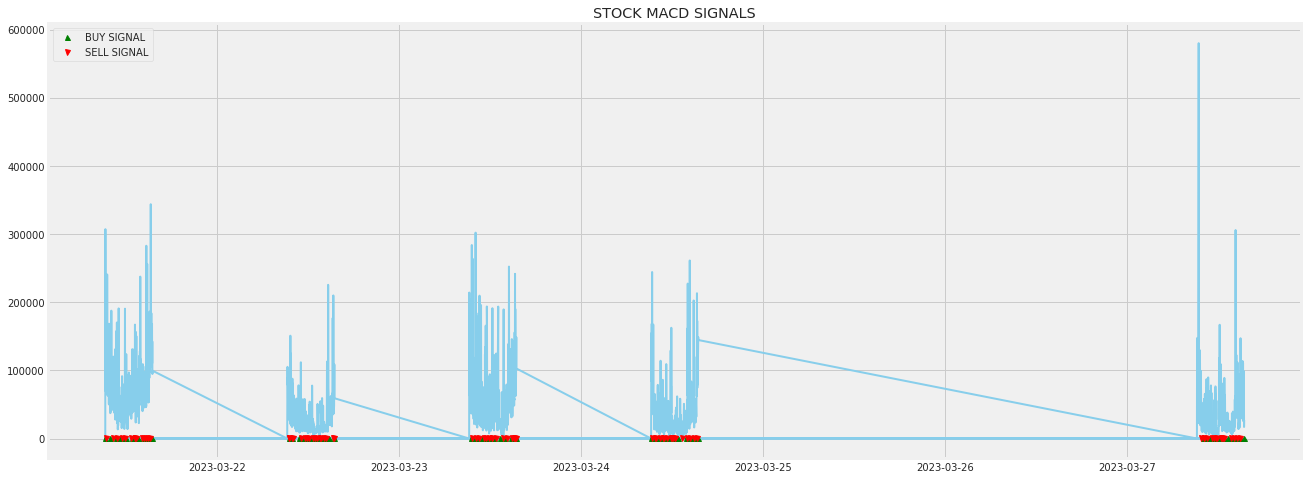

In [ ]:
## macd signal plot
plt.figure(figsize=(20,8))
plt.plot(stock_data, color = 'skyblue', linewidth = 2)
plt.plot(stk_macd.index, buy_price, marker = '^', color = 'g', markersize = 5, label = 'BUY SIGNAL', linewidth = 0)
plt.plot(stk_macd.index, sell_price, marker = 'v', color = 'r', markersize = 5, label = 'SELL SIGNAL', linewidth = 0)
plt.title('STOCK MACD SIGNALS')
plt.legend()
plt.show()


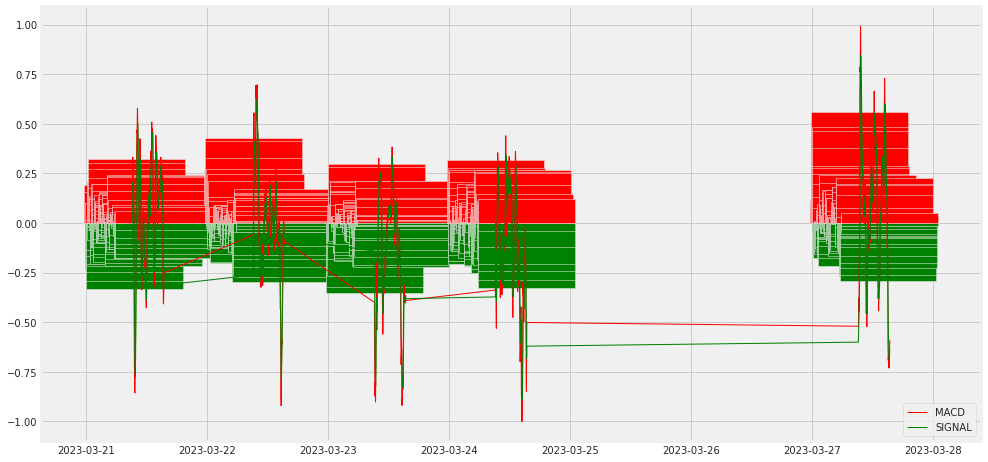

In [ ]:
## macd VS signal plotr
plt.figure(figsize=(15,8))
plt.plot(stk_macd['macd'], color = 'red', linewidth = 1, label = 'MACD')
plt.plot(stk_macd['signal'], color = 'green', linewidth = 1, label = 'SIGNAL')

for i in range(len(stk_macd)):
    if str(stk_macd['hist'][i])[0] == '-':
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'green')
    else:
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'red')

plt.legend(loc = 'lower right')
plt.show()